In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json
import tabula


In [12]:

def load_data(file_type, file_path):
    if file_type == 'json':
        return pd.read_json(file_path)
    elif file_type == 'xlsx':
        return pd.read_excel(file_path)
    elif file_type == 'html':
        return pd.read_html(file_path)[0]
    elif file_type == 'pdf':
        return tabula.read_pdf(file_path, pages='all')[0]
    else:
        raise ValueError("Unsupported file type. Supported types: 'json', 'xlsx', 'html', 'pdf'")


In [13]:
airlines = load_data('json', 'data/airlines.json')
flights = load_data('xlsx', 'data/flights.xlsx')
airports = load_data('xlsx', 'data/airports.xlsx')
planes = load_data('html', 'data/planes.html')
# weather = load_data('pdf', 'data/qweather.pdf')

#Format flight data
flights_split = flights.iloc[:, 0].str.split(',', expand=True)

flights_split.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']

flights_split = flights_split.apply(pd.to_numeric, errors='ignore')


# Update the flights variable
flights = flights_split

print(flights.dtypes)


C:\Users\kilia\AppData\Local\Temp\ipykernel_31372\221997645.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  flights_split = flights_split.apply(pd.to_numeric, errors='ignore')


year               int64
month              int64
day                int64
dep_time          object
sched_dep_time     int64
dep_delay         object
arr_time          object
sched_arr_time     int64
arr_delay         object
carrier           object
flight             int64
tailnum           object
origin            object
dest              object
air_time          object
distance           int64
hour               int64
minute             int64
time_hour         object
dtype: object


In [14]:
#Show types of data
# print('AIRLINES:\n', airlines.dtypes)
print('\n\nFLIGHTS:\n', flights.dtypes)
# print('\n\nPLANES:\n', planes.dtypes)
# print('\n\nAIRPORTS:\n', airports.dtypes)




FLIGHTS:
 year               int64
month              int64
day                int64
dep_time          object
sched_dep_time     int64
dep_delay         object
arr_time          object
sched_arr_time     int64
arr_delay         object
carrier           object
flight             int64
tailnum           object
origin            object
dest              object
air_time          object
distance           int64
hour               int64
minute             int64
time_hour         object
dtype: object


In [15]:
#q1
total_airports = airports['faa'].nunique()
airports_no_dst = airports[airports['dst'] == 'N'].shape[0]
time_zones = airports['tzone'].nunique()
total_airlines = airlines['carrier'].nunique()
total_planes = planes['tailnum'].nunique()

print(f"Total number of airports: {total_airports}")
print(f"Number of airports without DST: {airports_no_dst}")
print(f"Number of time zones: {time_zones}")
print(f"Total number of airlines: {total_airlines}")
print(f"Total number of planes: {total_planes}")


Total number of airports: 1458
Number of airports without DST: 23
Number of time zones: 10
Total number of airlines: 16
Total number of planes: 3322


In [21]:
#q3
#Aeroport avec le plus de départ
most_used_origin = flights['origin'].value_counts().idxmax()
most_used_origin_name = airports[airports['faa'] == most_used_origin]['name'].values[0]
print(f"L'aéroport de départ le plus emprunté est : {most_used_origin_name}")

#10 destinations les plus et moins prisées
destination_counts = flights['dest'].value_counts()
top_10_destinations = destination_counts.head(10)
bottom_10_destinations = destination_counts.tail(10)

print("Les 10 destinations les plus prisées :")
print(top_10_destinations)
print("Les 10 destinations les moins prisées :")
print(bottom_10_destinations)

# # Ajouter les noms complets des destinations
# top_10_destinations = top_10_destinations.reset_index().merge(airports[['faa', 'name']], left_on='index', right_on='faa')
# bottom_10_destinations = bottom_10_destinations.reset_index().merge(airports[['faa', 'name']], left_on='index', right_on='faa')

# # Calculer les pourcentages
# total_flights = flights.shape[0]
# top_10_destinations['percentage'] = (top_10_destinations['dest'] / total_flights) * 100
# bottom_10_destinations['percentage'] = (bottom_10_destinations['dest'] / total_flights) * 100

# print("Les 10 destinations les plus prisées :")
# print(top_10_destinations[['name', 'percentage']])

# print("Les 10 destinations les moins prisées :")
# print(bottom_10_destinations[['name', 'percentage']])

# 3. Trouver les 10 avions qui ont le plus et le moins décollé
plane_counts = flights['tailnum'].value_counts()
top_10_planes = plane_counts.head(10).reset_index()
bottom_10_planes = plane_counts.tail(10).reset_index()

top_10_planes.columns = ['tailnum', 'flights_count']
bottom_10_planes.columns = ['tailnum', 'flights_count']

print("Les 10 avions qui ont le plus décollé :")
print(top_10_planes[['tailnum', 'flights_count']])

print("Les 10 avions qui ont le moins décollé :")
print(bottom_10_planes[['tailnum', 'flights_count']])



L'aéroport de départ le plus emprunté est : Newark Liberty Intl
Les 10 destinations les plus prisées :
dest
ATL    12946
ORD    12654
LAX    11895
BOS    11560
MCO    10637
CLT    10448
SFO     9729
FLL     9443
MIA     8938
DCA     7386
Name: count, dtype: int64
Les 10 destinations les moins prisées :
dest
CHO    31
JAC    25
BZN    20
PSP    19
EYW    17
TVC    16
MTJ    15
HDN    15
SBN     4
LEX     1
Name: count, dtype: int64
Les 10 avions qui ont le plus décollé :
  tailnum  flights_count
0                   1973
1  N725MQ            443
2  N723MQ            394
3  N713MQ            385
4  N722MQ            378
5  N711MQ            376
6  N258JB            332
7  N353JB            316
8  N542MQ            310
9  N351JB            310
Les 10 avions qui ont le moins décollé :
  tailnum  flights_count
0  N914DN              1
1  N7ACAA              1
2  N302AS              1
3  N585AS              1
4  N7AXAA              1
5  N907DA              1
6  N941FR              1
7  N350SW

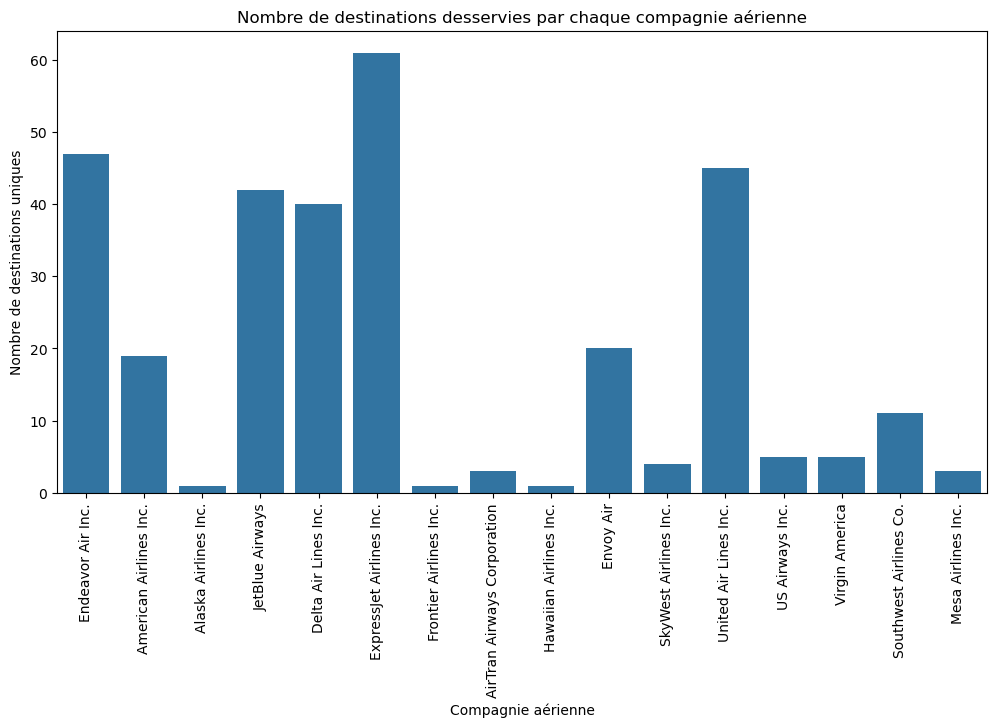

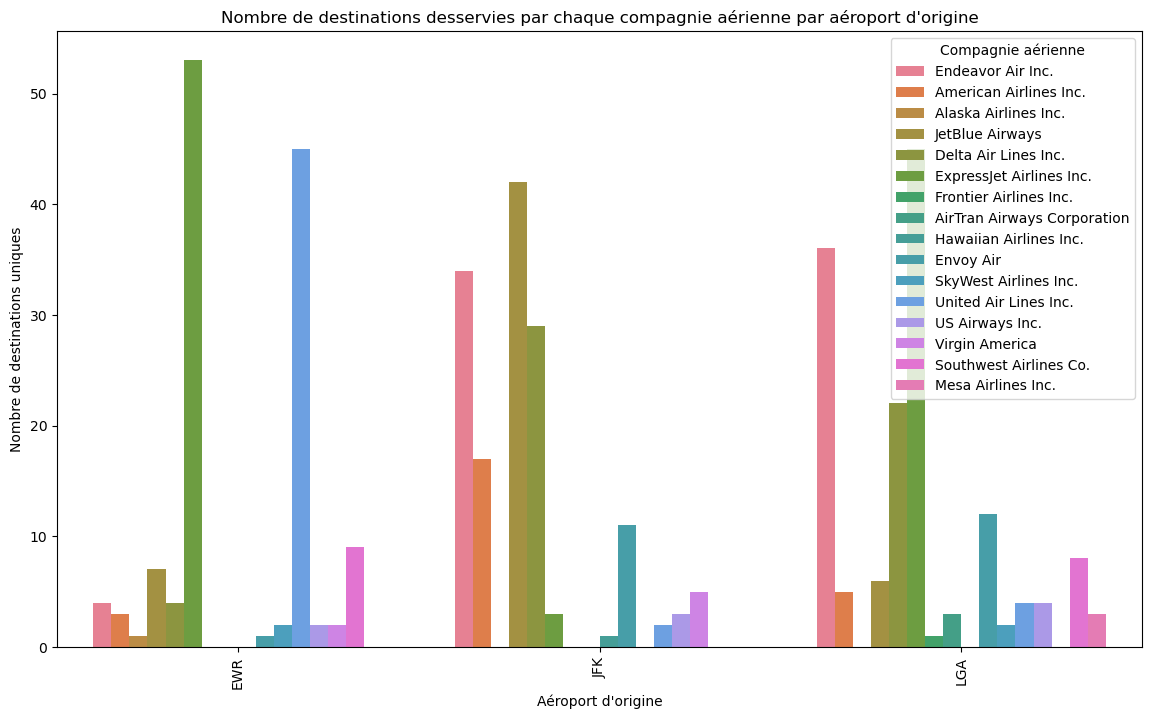

In [22]:
#q4
destinations_per_carrier = flights.groupby('carrier')['dest'].nunique().reset_index()
destinations_per_carrier.columns = ['carrier', 'unique_destinations']

destinations_per_carrier_origin = flights.groupby(['carrier', 'origin'])['dest'].nunique().reset_index()
destinations_per_carrier_origin.columns = ['carrier', 'origin', 'unique_destinations']

destinations_per_carrier = destinations_per_carrier.merge(airlines, on='carrier')
destinations_per_carrier_origin = destinations_per_carrier_origin.merge(airlines, on='carrier')

plt.figure(figsize=(12, 6))
sns.barplot(data=destinations_per_carrier, x='name', y='unique_destinations')
plt.xticks(rotation=90)
plt.title('Nombre de destinations desservies par chaque compagnie aérienne')
plt.xlabel('Compagnie aérienne')
plt.ylabel('Nombre de destinations uniques')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=destinations_per_carrier_origin, x='origin', y='unique_destinations', hue='name')
plt.xticks(rotation=90)
plt.title('Nombre de destinations desservies par chaque compagnie aérienne par aéroport d\'origine')
plt.xlabel('Aéroport d\'origine')
plt.ylabel('Nombre de destinations uniques')
plt.legend(title='Compagnie aérienne')
plt.show()

In [23]:
#q5
#Vvols ayant atterri à Houston (IAH ou HOU)
houston_flights = flights[flights['dest'].isin(['IAH', 'HOU'])]
print(f"Nombre de vols ayant atterri à Houston (IAH ou HOU) : {houston_flights.shape[0]}")

#Vols partant des aéroports de NYC (EWR, JFK, LGA) vers Seattle (SEA)
nyc_to_seattle_flights = flights[(flights['origin'].isin(['EWR', 'JFK', 'LGA'])) & (flights['dest'] == 'SEA')]
print(f"Nombre de vols partant des aéroports de NYC vers Seattle : {nyc_to_seattle_flights.shape[0]}")

#Compagnies desservent cette destination
nyc_to_seattle_carriers = nyc_to_seattle_flights['carrier'].nunique()
print(f"Nombre de compagnies desservant Seattle depuis NYC : {nyc_to_seattle_carriers}")

#Nombre d'avions 'uniques' desservent cette destination
nyc_to_seattle_planes = nyc_to_seattle_flights['tailnum'].nunique()
print(f"Nombre d'avions 'uniques' desservant Seattle depuis NYC : {nyc_to_seattle_planes}")

Nombre de vols ayant atterri à Houston (IAH ou HOU) : 6958
Nombre de vols partant des aéroports de NYC vers Seattle : 2736
Nombre de compagnies desservant Seattle depuis NYC : 5
Nombre d'avions 'uniques' desservant Seattle depuis NYC : 857


In [ ]:
#q6
#Nombre de vols par destination
flights_per_dest = flights['dest'].value_counts().reset_index()
flights_per_dest.columns = ['dest', 'flights_count']

# Jointure entre aéropotes et destination
flights_per_dest = flights_per_dest.merge(airports[['faa', 'name']], left_on='dest', right_on='faa', how='left')
flights_per_dest = flights_per_dest[['dest', 'name', 'flights_count']]
flights_per_dest.columns = ['dest', 'destination_name', 'flights_count']

# JJointure entre flights et airports
flights_with_names = flights.merge(airports[['faa', 'name']], left_on='origin', right_on='faa', how='left')
flights_with_names = flights_with_names.merge(airlines[['carrier', 'name']], on='carrier', how='left')
flights_with_names = flights_with_names[['dest', 'origin', 'carrier', 'name_x', 'name_y']]
flights_with_names.columns = ['dest', 'origin', 'carrier', 'origin_name', 'carrier_name']

# Tri des vols
sorted_flights = flights_with_names.sort_values(by=['dest', 'origin_name', 'carrier_name'])

# Afficher les résultats
print(flights_per_dest)
print(sorted_flights)

    dest                    destination_name  flights_count
0    ATL     Hartsfield Jackson Atlanta Intl          12946
1    ORD                  Chicago Ohare Intl          12654
2    LAX                    Los Angeles Intl          11895
3    BOS  General Edward Lawrence Logan Intl          11560
4    MCO                        Orlando Intl          10637
..   ...                                 ...            ...
98   TVC              Cherry Capital Airport             16
99   MTJ           Montrose Regional Airport             15
100  HDN                        Yampa Valley             15
101  SBN                     South Bend Rgnl              4
102  LEX                          Blue Grass              1

[103 rows x 3 columns]
       dest origin carrier          origin_name              carrier_name
27881   ABQ    JFK      B6  John F Kennedy Intl           JetBlue Airways
28867   ABQ    JFK      B6  John F Kennedy Intl           JetBlue Airways
29830   ABQ    JFK      B6  John F

In [25]:
#q7
#Compagnies qui voles pas sur tt les pays
total_origins = flights['origin'].nunique()
carriers_not_all_origins = destinations_per_carrier_origin.groupby('carrier')['origin'].nunique()
carriers_not_all_origins = carriers_not_all_origins[carriers_not_all_origins < total_origins].reset_index()
carriers_not_all_origins = carriers_not_all_origins.merge(airlines, on='carrier')
print("Compagnies qui n'opèrent pas sur tous les aéroports d'origine :")
print(carriers_not_all_origins[['carrier', 'name']])

#Compagnies voyageant sur tt les pays
total_destinations = flights['dest'].nunique()
carriers_all_destinations = destinations_per_carrier[destinations_per_carrier['unique_destinations'] == total_destinations]
print("Compagnies qui desservent l'ensemble des destinations :")
print(carriers_all_destinations[['carrier', 'name']])

#Récap destinations par compagnie
origins_destinations_per_carrier = flights.groupby(['carrier', 'origin', 'dest']).size().reset_index(name='flights_count')
origins_destinations_per_carrier = origins_destinations_per_carrier.merge(airlines, on='carrier')
origins_destinations_per_carrier = origins_destinations_per_carrier.merge(airports[['faa', 'name']], left_on='origin', right_on='faa', suffixes=('', '_origin'))
origins_destinations_per_carrier = origins_destinations_per_carrier.merge(airports[['faa', 'name']], left_on='dest', right_on='faa', suffixes=('', '_dest'))
origins_destinations_per_carrier = origins_destinations_per_carrier[['carrier', 'name', 'origin', 'name_origin', 'dest', 'name_dest', 'flights_count']]
origins_destinations_per_carrier.columns = ['carrier', 'carrier_name', 'origin', 'origin_name', 'dest', 'dest_name', 'flights_count']

print("Tableau récapitulatif des origines et des destinations pour chaque compagnie :")
print(origins_destinations_per_carrier)

Compagnies qui n'opèrent pas sur tous les aéroports d'origine :
  carrier                         name
0      AS         Alaska Airlines Inc.
1      F9       Frontier Airlines Inc.
2      FL  AirTran Airways Corporation
3      HA       Hawaiian Airlines Inc.
4      OO        SkyWest Airlines Inc.
5      VX               Virgin America
6      WN       Southwest Airlines Co.
7      YV           Mesa Airlines Inc.
Compagnies qui desservent l'ensemble des destinations :
Empty DataFrame
Columns: [carrier, name]
Index: []
Tableau récapitulatif des origines et des destinations pour chaque compagnie :
    carrier            carrier_name origin          origin_name dest  \
0        9E       Endeavor Air Inc.    EWR  Newark Liberty Intl  ATL   
1        9E       Endeavor Air Inc.    EWR  Newark Liberty Intl  CVG   
2        9E       Endeavor Air Inc.    EWR  Newark Liberty Intl  DTW   
3        9E       Endeavor Air Inc.    EWR  Newark Liberty Intl  MSP   
4        9E       Endeavor Air Inc.    

In [26]:
#q7
destinations_per_carrier_count = flights.groupby('dest')['carrier'].nunique().reset_index()
destinations_per_carrier_count.columns = ['dest', 'carrier_count']

exclusive_destinations = destinations_per_carrier_count[destinations_per_carrier_count['carrier_count'] == 1]

exclusive_destinations = exclusive_destinations.merge(flights_with_names[['dest', 'carrier', 'carrier_name']], on='dest')
exclusive_destinations = exclusive_destinations.drop_duplicates(subset=['dest'])

print("Destinations exclusives à certaines compagnies :")
print(exclusive_destinations[['dest', 'carrier_name']])

Destinations exclusives à certaines compagnies :
     dest                 carrier_name
0     ABQ              JetBlue Airways
164   ACK              JetBlue Airways
256   ALB     ExpressJet Airlines Inc.
642   BHM     ExpressJet Airlines Inc.
857   BUR              JetBlue Airways
1138  BZN        United Air Lines Inc.
1158  CAK  AirTran Airways Corporation
1780  CHO     ExpressJet Airlines Inc.
1811  CRW                    Envoy Air
1949  EYW         Delta Air Lines Inc.
1966  GSO     ExpressJet Airlines Inc.
3165  HDN        United Air Lines Inc.
3180  ILM     ExpressJet Airlines Inc.
3269  LEX            Endeavor Air Inc.
3270  LGB              JetBlue Airways
3768  MDW       Southwest Airlines Co.
6864  MSN     ExpressJet Airlines Inc.
7305  MTJ        United Air Lines Inc.
7320  MYR     ExpressJet Airlines Inc.
7378  OAK              JetBlue Airways
7600  OKC     ExpressJet Airlines Inc.
7858  PSE              JetBlue Airways
8133  PSP               Virgin America
8152  PVD     E